## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [1]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
from sklearn.metrics import roc_curve, roc_auc_score

## Prepare the data set

In [33]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [34]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [35]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [36]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [37]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [38]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [39]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [40]:
target = 'survived'

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   cabin     295 non-null    object 
 8   embarked  1307 non-null   object 
 9   title     1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [42]:
vars_num = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
vars_num.remove('survived')
vars_cat = data.select_dtypes(include=['object']).columns.tolist()

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 5
Number of categorical variables: 4


### Find missing values in variables

In [43]:
# numerical variables

# Checking for missing values in numerical variables
print('Missing values in numerical variables:')
print(data[vars_num].isnull().sum())



Missing values in numerical variables:
pclass      0
age       263
sibsp       0
parch       0
fare        1
dtype: int64


In [44]:
# categorical variables

# Checking for missing values in categorical variables
print('Missing values in categorical variables:')
print(data[vars_cat].isnull().sum())

Missing values in categorical variables:
sex            0
cabin       1014
embarked       2
title          0
dtype: int64


### Determine cardinality of categorical variables

In [45]:
print('Cardinality of categorical variables:')
print(data[vars_cat].nunique())

Cardinality of categorical variables:
sex           2
cabin       181
embarked      3
title         5
dtype: int64


### Determine the distribution of numerical variables

In [46]:
print('Descriptive statistics for numerical variables:')
print(data[vars_num].describe())

Descriptive statistics for numerical variables:
            pclass          age        sibsp        parch         fare
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000
mean      2.294882    29.881135     0.498854     0.385027    33.295479
std       0.837836    14.413500     1.041658     0.865560    51.758668
min       1.000000     0.166700     0.000000     0.000000     0.000000
25%       2.000000    21.000000     0.000000     0.000000     7.895800
50%       3.000000    28.000000     0.000000     0.000000    14.454200
75%       3.000000    39.000000     1.000000     0.000000    31.275000
max       3.000000    80.000000     8.000000     9.000000   512.329200


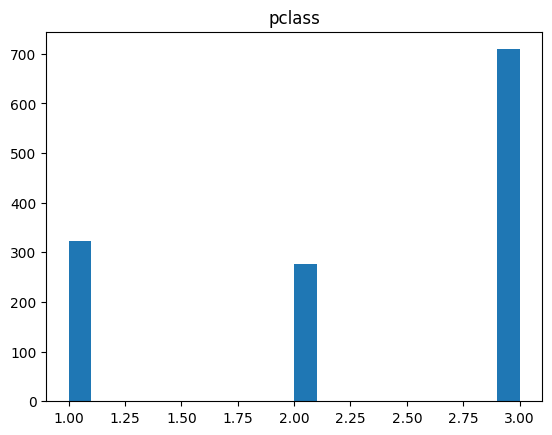

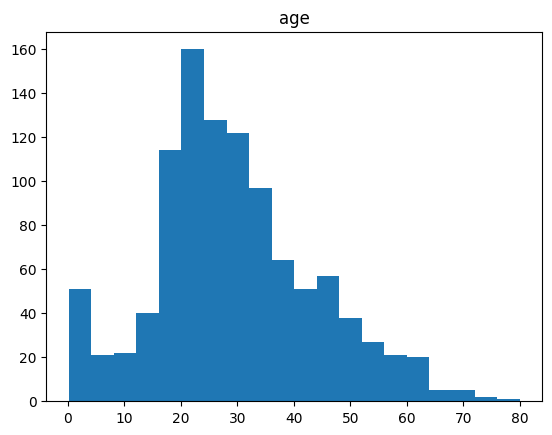

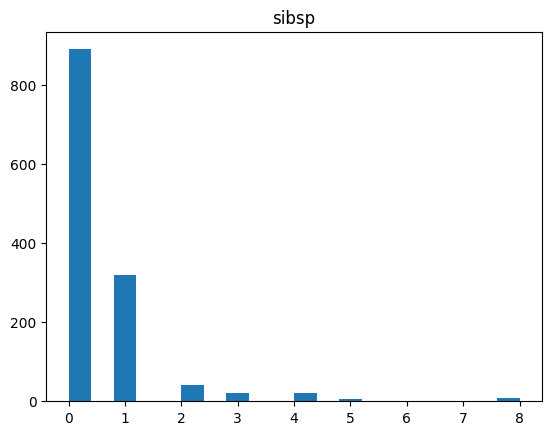

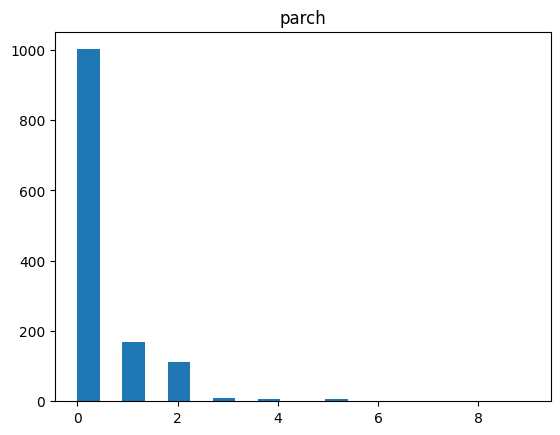

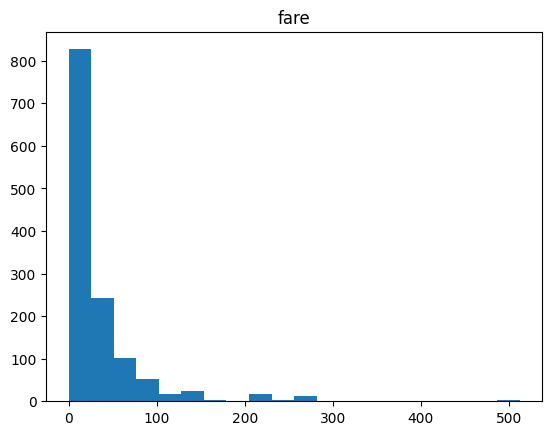

In [47]:
# Histograms for numerical variables
for var in vars_num:
    plt.hist(data[var], bins=20)
    plt.title(var)
    plt.show()

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [49]:
X_train.columns, X_test.columns

(Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked',
        'title'],
       dtype='object'),
 Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked',
        'title'],
       dtype='object'))

In [50]:
# Extracting the letter from the Cabin variable
X_train['Cabin_Letter'] = X_train['cabin'].str.extract(r'([A-Za-z])')
X_test['Cabin_Letter'] = X_test['cabin'].str.extract(r'([A-Za-z])')

# Dropping the original Cabin variable
X_train = X_train.drop('cabin', axis=1)
X_test = X_test.drop('cabin', axis=1)

In [51]:
vars_cat_tr = X_train.select_dtypes(include=['object']).columns.tolist()
vars_cat_te = X_test.select_dtypes(include=['object']).columns.tolist()
vars_num_tr = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
vars_num_te = X_test.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [52]:
vars_cat_tr, vars_cat_te, vars_num_tr, vars_num_te

(['sex', 'embarked', 'title', 'Cabin_Letter'],
 ['sex', 'embarked', 'title', 'Cabin_Letter'],
 ['pclass', 'age', 'sibsp', 'parch', 'fare'],
 ['pclass', 'age', 'sibsp', 'parch', 'fare'])

### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [53]:
# Creating binary missing indicators for numerical variables
for var in vars_num_tr:
    X_train[var+'_NA'] = np.where(X_train[var].isnull(), 1, 0)
for var in vars_num_te:
    X_test[var+'_NA'] = np.where(X_test[var].isnull(), 1, 0)
# Filling missing values with the median for numerical variables
median_vals = X_train[vars_num_tr].median()
median_vals =X_test[vars_num_te].median()
X_train[vars_num_tr] = X_train[vars_num_tr].fillna(median_vals)
X_test[vars_num_te] = X_test[vars_num_te].fillna(median_vals)

### Replace Missing data in categorical variables with the string **Missing**

In [54]:
# Replacing missing values with 'Missing' for categorical variables

X_train[vars_cat_tr] = X_train[vars_cat_tr].fillna('Missing')
X_test[vars_cat_te] = X_test[vars_cat_te].fillna('Missing')

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [55]:
# Removing labels present in less than 5% of the passengers for categorical variables
for var in vars_cat_tr:
    freqs = X_train[var].value_counts(normalize=True)
    low_freq_labels = freqs[freqs < 0.05].index
    X_train[var] = np.where(X_train[var].isin(low_freq_labels), 'Other', X_train[var])
for var in vars_cat_te:
    freqs = X_test[var].value_counts(normalize=True)
    low_freq_labels = freqs[freqs < 0.05].index
    X_test[var] = np.where(X_test[var].isin(low_freq_labels), 'Other', X_test[var])


### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [56]:
X_train= pd.get_dummies(X_train, columns=vars_cat_tr, drop_first=True)
X_test= pd.get_dummies(X_test, columns=vars_cat_te, drop_first=True)

### Scale the variables

- Use the standard scaler from Scikit-learn

In [57]:
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler object
scaler = StandardScaler()

In [58]:
X_train[vars_num_tr] = scaler.fit_transform(X_train[vars_num_tr])
X_test[vars_num_te] = scaler.transform(X_test[vars_num_te])

In [59]:
# Saveing the train and test sets to csv files 

X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

y_train.to_csv('ytrain.csv', index=False)
y_test.to_csv('ytest.csv', index=False)

In [60]:
joblib.dump(scaler, 'Standard_Scaler.joblib') 

['Standard_Scaler.joblib']

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [65]:
from sklearn.linear_model import LogisticRegression

# Setting the regularization parameter to 0.0005
C = 0.0005

# Setting the random seed to 0
random_state = 0

# Creating a logistic regression object
logreg = LogisticRegression(C=C, random_state=random_state)

# Fitting the model to the training data
logreg.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [67]:
# Getting predictions from the logistic regression model
y_pred = logreg.predict(X_test)

# Getting predicted probabilities of survival
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Computing the accuracy of the model
accuracy_test = accuracy_score(y_test, y_pred)

# Computing the ROC AUC of the model
roc_auc_test = roc_auc_score(y_test, y_pred_prob)

print('Accuracy_test: {:.3f}'.format(accuracy_test))
print('ROC AUC_test: {:.3f}'.format(roc_auc_test))

Accuracy_test: 0.626
ROC AUC_test: 0.807


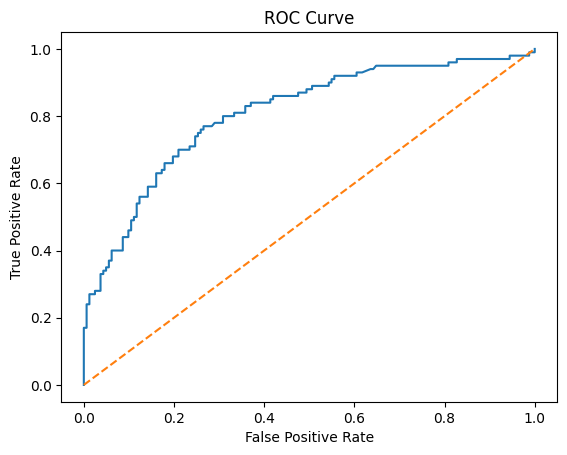

In [68]:
 # Compute the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**